<a href="https://colab.research.google.com/github/tomoharukawamura/python/blob/master/fifth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import math

dx = 0.05
dy = dx
dt = 0.025
tmin = 0.0 
tmax = 1.5 #simulate time

#rectangle domain
xmin = 0.0
xmax = 1.0
ymin = 0.0
ymax = 1.0

nx = int((xmax-xmin)/dx) + 1
ny = int((ymax-ymin)/dy) + 1
nt = int((tmax-tmin)/dt) + 2

#mesh
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)

#solution
u = np.zeros((nt,nx,ny))

umax = 4
umin = -4

def calc_border_condition(TIME):
    pi=math.pi
    left_term=1-2*pi**2*(TIME-1)**2
    right_term=math.exp(-pi**2*(TIME-1)**2)
    return left_term*right_term

c=1.0
#simulation

for t in range(1,nt-1):
    time=dt*t
    bor_val=calc_border_condition(time)
    for x in range(0,nx):
        if x!=0 and x!=nx-1:
            for y in range(0,ny):
                if y!=0 and y!=ny-1:
                    first_term=(c*dt/dx)**2
                    second_term=u[t-1][x+1][y]-2*u[t-1][x][y]+u[t-1][x-1][y]+u[t-1][x][y+1]-2*u[t-1][x][y]+u[t-1][x][y-1]
                    third_term=2*u[t-1][x][y]-u[t-2][x][y] if t!=1 else 2*u[t-1][x][y]
                    res=first_term*second_term+third_term
                    u[t][x][y]+=res
                else:
                    u[t][x][y]+=bor_val
        else:
            for y in range(0,ny):
                u[t][x][y]+=bor_val

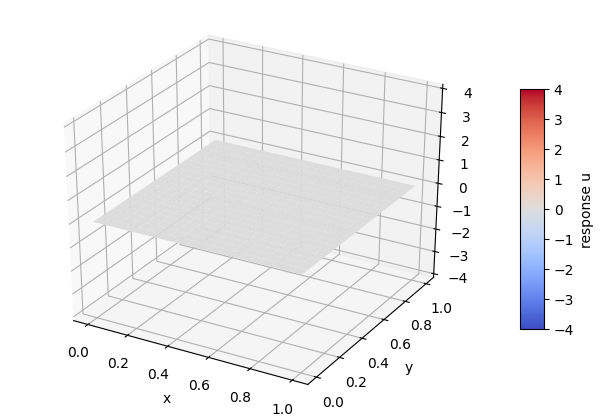

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)
surf=ax.plot_surface(X, Y, u[0], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)
fig.colorbar(surf, shrink=0.6, aspect=10, label='response u')

def animate(i):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(umin, umax)
    ax.plot_surface(X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)

anim=animation.FuncAnimation(fig,animate,frames=nt-1,interval=100,repeat=True)

rc('animation', html='jshtml')
anim

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_graph(Z, umin, umax):
    fig = plt.figure()
    fig.set_dpi(100)

    ax = Axes3D(fig)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim(umin, umax)
    surf=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=umax,vmin=umin)
    fig.colorbar(surf, shrink=0.6, aspect=10, label='response u')


def visualize_2d_graph(Y, dt):
    plt.grid()
    plt.xlabel('time t')
    plt.ylabel('response u')
    X = [dt*t for t in range(len(Y))]
    plt.plot(X, Y)

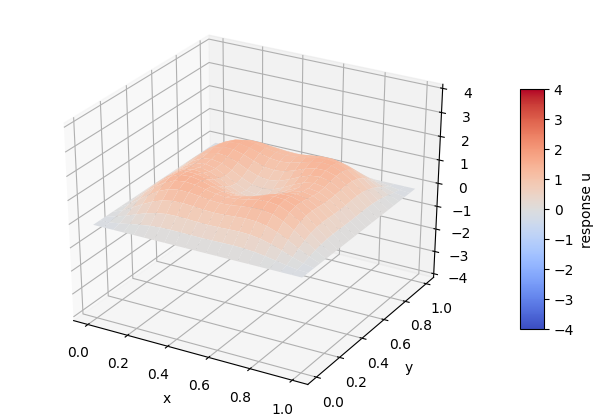

In [24]:
visualize_3d_graph(u[50], umin, umax)